# Import data and libraries ----------------------

In [1]:
import os
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./uss.csv')
df.head()
df = df[['a_docId', 'a_comment_date', 'a_content_comment' , 'a_rating']]
df['a_rating'] = [int(x[:1]) for x in df['a_rating']]
df

,a_docId,a_comment_date,a_content_comment,a_rating
0,1,Mar-22,"Terrible !!!...open at 12 noon, close at 7pm. ...",1
1,2,Feb-22,I see other people's reviews about a lot of it...,4
2,3,Feb-22,"As several previous reviewers have noted, the ...",2
3,8,Feb-22,"We paid FULL price for the tickets, only to fi...",1
4,9,Feb-22,"Multiple rides, shows (100% of the shows were ...",1
...,...,...,...,...
10103,15773,Failed,Ticket to enter the park costs SGD66.00 which ...,3
10104,15774,Failed,"Upon our entry, we decided to head around the ...",2
10105,15775,Failed,While what they have got so far looks like it ...,2
10106,15776,Failed,I expected Universal Studios Singapore to be i...,3


# Data Preprocessing ----------------------

## Basic formatting

In [4]:
# Check for null values and shape of df
print('----------Null values----------')
print(df.isnull().values.any())
print('----------DF shape----------')
print(df.shape)

----------Null values----------
False
----------DF shape----------
(10108, 4)


In [5]:
# Remove duplicates
df.drop_duplicates(subset="a_docId",inplace=True, keep="first")

print(df.head())
print(df.shape)


   a_docId a_comment_date                                  a_content_comment  \
0        1         Mar-22  Terrible !!!...open at 12 noon, close at 7pm. ...   
1        2         Feb-22  I see other people's reviews about a lot of it...   
2        3         Feb-22  As several previous reviewers have noted, the ...   
3        8         Feb-22  We paid FULL price for the tickets, only to fi...   
4        9         Feb-22  Multiple rides, shows (100% of the shows were ...   

   a_rating  
0         1  
1         4  
2         2  
3         1  
4         1  
(10108, 4)


## Add approximate sentiment

<AxesSubplot:xlabel='approximate_sentiment', ylabel='count'>

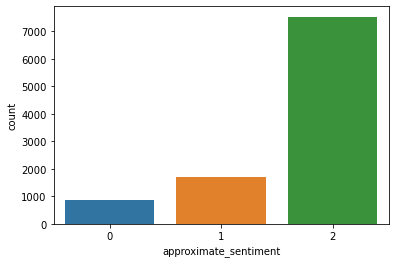

In [6]:
#Ratings 1, 2: Negative (class 0)
#Rating 3: Neutral (class 1)
#Rating 4, 5: Positive (class 2)

def approximateSentiment(rating):
    if rating < 3:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2
    
df['approximate_sentiment'] = df['a_rating'].apply(approximateSentiment)

class_names = ['Positive' , 'Netural' , 'Negative']
#View the approximate sentiment of the reviews, if there many neutral classes
#Later will have to used weighted F1 score to tackle the issue of imbalanced dataset
import seaborn as sns
sns.countplot(x='approximate_sentiment', data=df)


## Data cleaning

In [7]:
import re

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
#download nltk data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
#load spacy library
nlp=spacy.load('en_core_web_sm')




# Store possible contractions

contraction_dict = {"can't": "cannot", "won't": "will not","where's": "where is", "what's": "what is", 
                    "that's": "that is", "he's": "he is", "she's": "she is", "i'm": "i am", 
                    "aren't": "are not", "can't": "can not", "couldn't": "could not", "didn't": "did not", "didn’t": "did not",
                    "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                    "haven't": "have not", "he'd": "he had", "he'll": "he will", "he's": "he is",
                    "i'd": "i had", "i'll": "i will", "i'm": "i am", "i've": "i have", 
                    "isn't": "is not", "let's": "let us", "mightn't": "might not", "mustn't": "must not",
                    "shan't": "shall not", "she'd": "she had", "she'll": "she will", "she's": "she is", 
                    "shouldn't": "should not", "that's": "that is", "there's": "there is", "they'd": "they had",
                    "they'll": "they will", "they're": "they are", "they've": "they have", "we'd": "we had", 
                    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                    "what're": "what are", "what's": "what is", "what've": "what have", "where's": "where is", 
                    "who'd": "who had", "who'll": "who will", "who're": "who are", "who's": "who is",
                    "who've": "who have", "won't": "will not", "wouldn't": "would not", "you'd": "you had", 
                    "you'll": "you will", "you're": "you are", "you've": "you have", "aaaa": "bbbb",
                    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is",
                    "ma'am": "madam", "mayn't": "may not", "aaaa": "bbbb", "aaaa": "bbbb",
                    "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                    "oughtn't": "ought not", "oughtn't've": "ought not have", "where'd": "where did",
                   "e.g.": "", "eg": "", "i.e.": "", "ie": "", "e.t.c.": "", "etc": "" }

Init Plugin
Init Graph Optimizer
Init Kernel


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bryan123bryan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bryan123bryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bryan123bryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def removeStopwords(text, stopList):
    string = ""

    specificStopwords = ['universal', 'studios', 'sg', 'uss', 'us', 'singapore', 'day', 'ride', 'park']
    
    for word in text.split():
        if word not in stopList and word not in specificStopwords:
            string += word + " "

    return string



def cleanData(review):
    #case folding
    review = review.lower()
    
    #remove general contractions
    review = re.sub(r"\'d"," would",review)
    review = re.sub(r"\'ll"," will",review)
    review = re.sub("\'s"," ",review)
    review = re.sub(r"\'re"," are",review)
    review = re.sub(r"\'ve"," have",review)
    
    #remove common contractions using stored contraction dictionary
    review = ' '.join([contraction_dict[t] if t in contraction_dict else t for t in review.split(" ")]) 
    

    #remove characters and symbols
    review = re.sub(r"[^a-zA-Z0-9]"," ",review)  #remove special characters
    review = re.sub(r"[0-9]+", "", review)  #remove numbers
    review = re.sub("(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)", "", review)  #remove single letters
    review = review.replace('   ', ' ') #change triple spaces to single space
    review = review.replace('  ', ' ') #change double spaces to single space
    
    
    #remove stopwords
    #stopwords of spacy
    stoplist1=nlp.Defaults.stop_words
    #stopwords of NLTK
    stoplist2=stopwords.words('english')
    #combining the stopword list
    combinedStopwords=set((set(stoplist1)|set(stoplist2)))
    review = removeStopwords(review, combinedStopwords)
    
    
    
    #lemmatization
    review = nlp(review)
    review = " ".join([token.lemma_ for token in review])
    review = review.replace('-PRON-', '')
    
    
    
    return review
    

In [9]:
# Clean data
df['a_clean_content'] = df['a_content_comment'].apply(cleanData)
df

,a_docId,a_comment_date,a_content_comment,a_rating,approximate_sentiment,a_clean_content
0,1,Mar-22,"Terrible !!!...open at 12 noon, close at 7pm. ...",1,0,terrible open noon close pm queue min ride can...
1,2,Feb-22,I see other people's reviews about a lot of it...,4,2,people review lot closed enjoy went sunday mor...
2,3,Feb-22,"As several previous reviewers have noted, the ...",2,0,previous reviewer note way operate moment make...
3,8,Feb-22,"We paid FULL price for the tickets, only to fi...",1,0,pay price ticket find ride show closed ride re...
4,9,Feb-22,"Multiple rides, shows (100% of the shows were ...",1,0,multiple ride show show available visit street...
...,...,...,...,...,...,...
10103,15773,Failed,Ticket to enter the park costs SGD66.00 which ...,3,1,ticket enter cost sgd frankly bit overpriced e...
10104,15774,Failed,"Upon our entry, we decided to head around the ...",2,0,entry decide head clockwise madagascar stop su...
10105,15775,Failed,While what they have got so far looks like it ...,2,0,get far look like amazing find unbelievable pl...
10106,15776,Failed,I expected Universal Studios Singapore to be i...,3,1,expect par typical theme standard dissapointme...


In [10]:
#text = df['a_content_comment'][9]
print('------------Original text------------')
print(df['a_content_comment'].iloc[0])

print()
print('------------Text after cleaning------------')
print(df['a_clean_content'].iloc[0])

------------Original text------------
Terrible !!!...open at 12 noon, close at 7pm. Everything also have to queue 40 to 60 mins. Only can do 3 rides, cant even have time to dine in. ice cream also need to redeem 30 mins before closing time. Weather is super hot....a few shops only opened to sell water. Tired of queueing insted of the facilities. Expensive and now worth it at all. Wasted time here in USS Singapore !!! USA is better !!!

------------Text after cleaning------------
terrible open noon close pm queue min ride can not time dine ice cream need redeem min closing time weather super hot shop open sell water tired queue inste facility expensive worth waste time usa well


In [11]:
df.to_csv('uss_cleaned.csv', index=False)